## <center><ins>Trabajo Práctico 2: Criticas de peliculas</ins></center>
#### <center>*Preprocesamiento*</center>
##### <center>75.06 / 95.58 Organización de Datos - FIUBA</center>
##### <center>Ing. Rodríguez - 1°C 2023</center>
---
#### <center>**Grupo 31 - "Datazo":**</center>
<center> Michael Mena - 102685</center>
<center>Pablo Brocca - 104256</center>
<center>Diego Kisinovsky - 106203</center>


---
---

## Dataset de entrenamiento

### Importamos las librerias

In [83]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Normalización
from sklearn.preprocessing import StandardScaler

import spacy

### Lectura del dataset

In [84]:
df = pd.read_csv('dataset/train.csv', sep=',', header=0)
df.head()

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           50000 non-null  int64 
 1   review_es    50000 non-null  object
 2   sentimiento  50000 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


### Preparación de features

In [86]:
# Mapeo de la columna "sentimiento" a valores numéricos
df['sentimiento'] = df['sentimiento'].map({'negativo': 0, 'positivo': 1})

In [87]:
df.drop(['ID'], axis=1, inplace=True)

### Analisis de los datos

#### Corrección de errores ortográficos

In [88]:
# TODO: No es necesario para este dataset, no hay errores ortográficos
# # Corrección de errores ortográficos
# from spellchecker import SpellChecker

# spell = SpellChecker(language='es')
# df['review_es'] = df['review_es'].apply(lambda x: ' '.join([spell.correction(word) for word in x.split()]))

### Lematización

In [89]:
# # Cargar el modelo de español en spaCy
# nlp = spacy.load('es_core_news_sm')

# # Función personalizada para lematizar el texto
# def lemmatize_text(text):
#     doc = nlp(text)
#     lemmatized_tokens = [token.lemma_ for token in doc]
#     return ' '.join(lemmatized_tokens)

In [90]:
# # Lematizar un ejemplo de texto
# lemmatized_text = lemmatize_text('Hola, estoy lematizando este texto.')
# print(lemmatized_text)

In [91]:
# # Lematizar la columna "review_es"
# df['review_es'] = df['review_es'].apply(lemmatize_text)

#### Creación de nuevas features

Se agrega una columna con la longitud de cada crítica

In [92]:
# Agrega una columna con la longitud de cada crítica
df['longitud'] = df['review_es'].str.len()

Text(0.5, 1.0, 'Distribución de la longitud de las críticas')

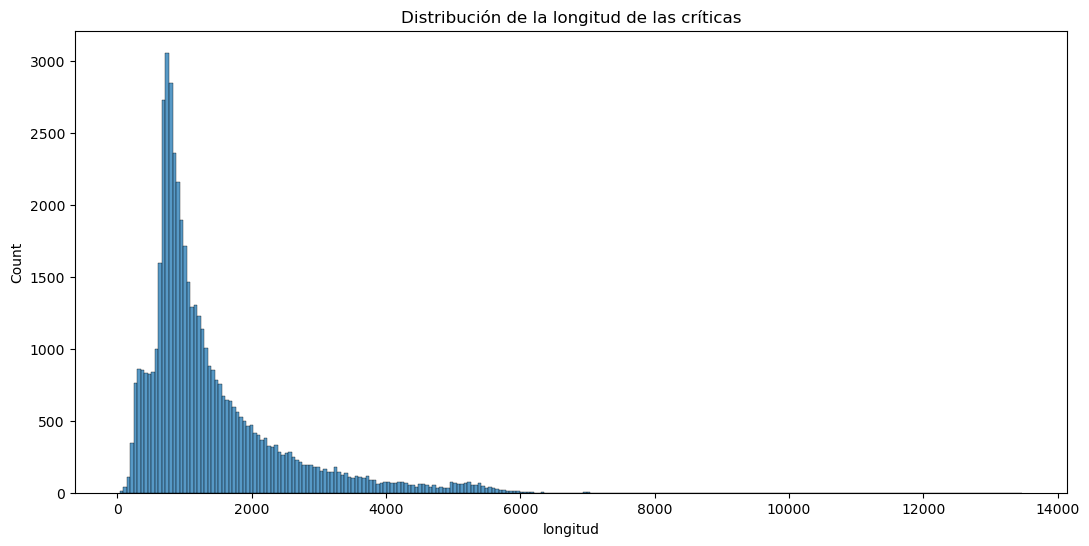

In [93]:
# Gráfico distribución de la longitud de las críticas
plt.figure(figsize=(12.8, 6))
sns.histplot(df['longitud']).set_title('Distribución de la longitud de las críticas')

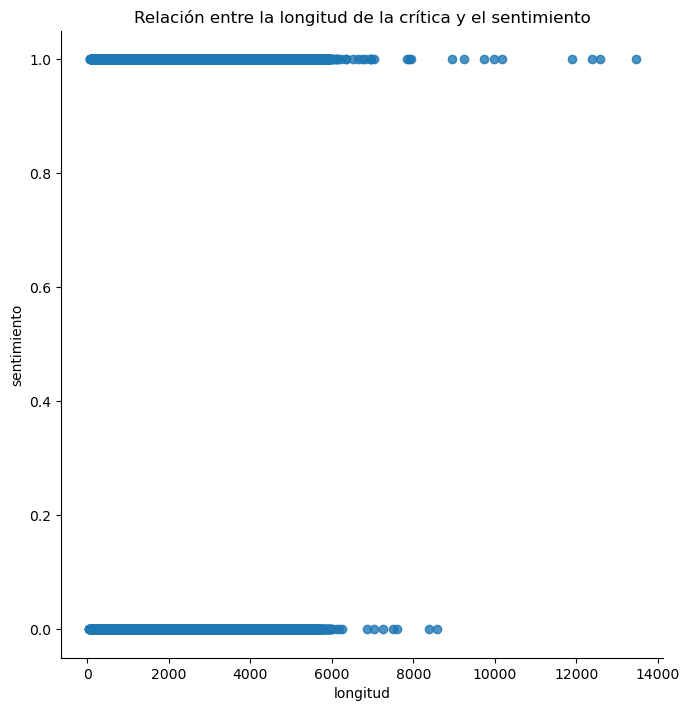

In [94]:
# Relacion entre la longitud de la crítica y el sentimiento
sns.lmplot(x='longitud', y='sentimiento', data=df, fit_reg=False, legend=True, height=7, aspect=1).set(title='Relación entre la longitud de la crítica y el sentimiento')

In [95]:
# Correlacion entre la logitud de la crítica y el sentimiento
df[['longitud', 'sentimiento']].corr()

,longitud,sentimiento
longitud,1.000000,0.014729
sentimiento,0.014729,1.000000


### Normalizacion

#### Normalizamos la columna 'longitud' con: $\frac{x_i - mean(x)}{stdev(x)}$

In [96]:
# Normalizo con standar scaler
scaler = StandardScaler()
df['longitud'] = scaler.fit_transform(df[['longitud']])
df.head()

,review_es,sentimiento,longitud
0,Uno de los otros críticos ha mencionado que de...,1,0.583940
1,Una pequeña pequeña producción.La técnica de f...,1,-0.324820
2,Pensé que esta era una manera maravillosa de p...,1,-0.394205
3,"Básicamente, hay una familia donde un niño peq...",0,-0.585980
4,"El ""amor en el tiempo"" de Petter Mattei es una...",1,0.007653


## Dataset de test

### Lectura del dataset:

In [97]:
df_test = pd.read_csv('dataset/test.csv', sep=',', header=0)
df_test

,ID,review_es
0,60000,La mayor virtud de esta película es su existen...
1,60001,"No soy un experto cinéfilo, pero pocas veces m..."
2,60002,Si no eres un incondicional del humor estilo T...
3,60003,"No sé qué está pasando, si la gente se deja ll..."
4,60004,"Pero cuando amanece,y me quedo solo,siento en ..."
...,...,...
8594,68594,"Buena no, lo siguiente. Por fin un film serio ..."
8595,68595,"Me esperaba mucho, pero que mucho, más.Guión m..."
8596,68596,"De mal cuerpo como sensación al finalizar, de ..."
8597,68597,Los que han añadido comentarios os lo han dich...


### Aplicamos las mismas transformaciones que al dataset de entrenamiento

In [98]:
# df_test.drop(['ID'], axis=1, inplace=True)

In [99]:
# Agrega una columna con la longitud de cada crítica
df_test['longitud'] = df_test['review_es'].str.len()

# Normalizo con standar scaler
df_test['longitud'] = scaler.transform(df_test[['longitud']])

In [100]:
# # Lematizar la columna "review_es"
# df_test['review_es'] = df_test['review_es'].apply(lemmatize_text)

In [101]:
df_test.head()

,ID,review_es,longitud
0,60000,La mayor virtud de esta película es su existen...,3.104953
1,60001,"No soy un experto cinéfilo, pero pocas veces m...",-0.192794
2,60002,Si no eres un incondicional del humor estilo T...,-0.594653
3,60003,"No sé qué está pasando, si la gente se deja ll...",0.452878
4,60004,"Pero cuando amanece,y me quedo solo,siento en ...",0.202319


## Exportación de datasets preprocesados

In [102]:
# Entrenamiento
df.to_csv('./dataset/train_preprocesado.csv', index=False)

# Test
df_test.to_csv('./dataset/test_preprocesado.csv', index=False)